<a href="https://colab.research.google.com/github/yaajnu/ColabNotebooks/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
int("hello")

ValueError: ignored

In [ ]:
!git clone https://github.com/yaajnu/facial_expressions.git


Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214
Receiving objects: 100% (14214/14214), 239.65 MiB | 13.05 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (13996/13996), done.


In [ ]:
!pip install flask
!pip install flask_sqlalchemy
!pip install datetime


     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 235kB 8.6MB/s 


In [ ]:
root_dir = "drive/My Drive/"
base_dir = root_dir + 'fastai-v3/'
!pip install flask-ngrok

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!pip install "torch==1.4" "torchvision==0.5.0"


     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 48.7MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from flask import Flask,render_template,request,redirect,url_for,send_from_directory
from datetime import datetime
import numpy as np
from flask import Flask,render_template,request,redirect,url_for,send_from_directory
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime
import os

In [ ]:
%mkdir templates -p

In [ ]:
%%writefile templates/base.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="{{url_for('static',filename='css\main.css')}}"
    {% block head %}{% endblock %}
</head>
<body>
    {% block body %}{% endblock %}
</body>
</html>
 

Writing templates/base.html


FileNotFoundError: ignored

In [ ]:
from flask import Flask,render_template,request,redirect,url_for,send_from_directory
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime
from flask_ngrok import run_with_ngrok
import os
app=Flask(__name__)
run_with_ngrok(app)
Upload='/content/drive/My Drive/Python Projects/Upload'
app.config['UPLOAD_FOLDER']=Upload
@app.route('/',methods=['GET','POST'])
def Uploaded():
    if request.method=='POST':
        if 'file' not in request.files:
            return redirect('/')
        file=request.files['file']
        if file.filename!='':
            file.save(os.path.join(app.config['UPLOAD_FOLDER'],file.filename))
            filename=file.filename
            return redirect(url_for('uploaded_file',filename=filename))
    else:
        return render_template('upload.html',template_folder='/content/Templates')

@app.route('/show/<filename>',methods=['GET','POST'])
def uploaded_file(filename):
    if request.method=='POST':
        return redirect('/')
    return render_template('body.html',filename=filename)
@app.route('/uploads/<filename>')
def send_file(filename):
    return send_from_directory(Upload, filename)
if __name__=="__main__":
    app.run()   


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://707bf82cae9b.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [05/Jul/2020 15:05:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2020 15:05:09] "GET /static/css%5Cmain.css HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2020 15:05:09] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2020 15:05:14] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2020 15:05:14] "GET /show/2017-07-07-lemur.jpg HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2020 15:05:14] "GET /static/css%5Cmain.css HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2020 15:05:14] "GET /uploads/2017-07-07-lemur.jpg HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2020 15:05:16] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2020 15:05:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2020 15:05:17] "GET /static/css%5Cmain.css HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2020 15:05:22] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [05/Jul/2020 15:05:23] "GET /show/Bamboo-Lemur_1445C2A9-S.-Meys-1.jpg HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2020 15:05:23] "GET /static/css%5Cmain.css HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2020 15

In [ ]:
path=Path("/content/drive/My Drive/Data/Face")

In [ ]:
type(path)

pathlib.PosixPath

In [ ]:
fnames = get_image_files(path)
fnames[:5]

[]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+) \(\d+\).jpg$|([^/]+) \(\d+\).png$|/([^/]+) \(\d+\).jpeg$'

In [ ]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

TypeError: ignored

In [ ]:
print(data)

NameError: ignored

In [ ]:
data = ImageDataBunch.from_folder(Path("/content/drive/My Drive/Data/Face"),train='.',valid_pct=0.2, ds_tfms=get_transforms(), size=224,num_workers=2, bs=64)

In [ ]:
data.normalize(imagenet_stats)

UnidentifiedImageError: ignored

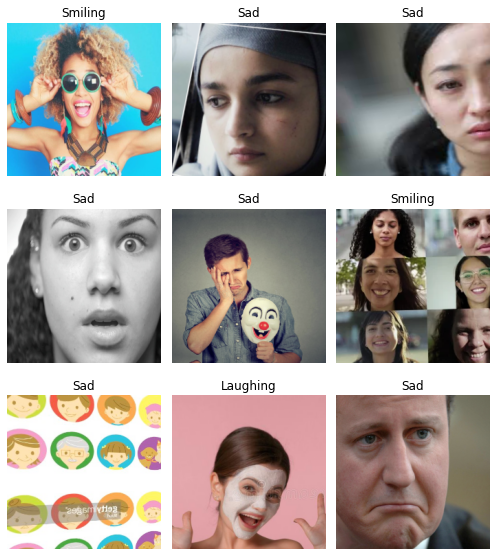

In [ ]:
data.show_batch(rows=3, figsize=(7,8))


In [ ]:
print(data.classes)


['Laughing', 'Sad', 'Smiling']


In [ ]:
path


PosixPath('/content/drive/My Drive/Data/train')

In [ ]:
len(data.classes),data.c

(4, 4)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4,slice(1e-3,1e-1))

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


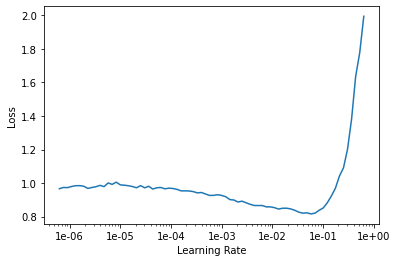

In [ ]:
learn.recorder.plot()

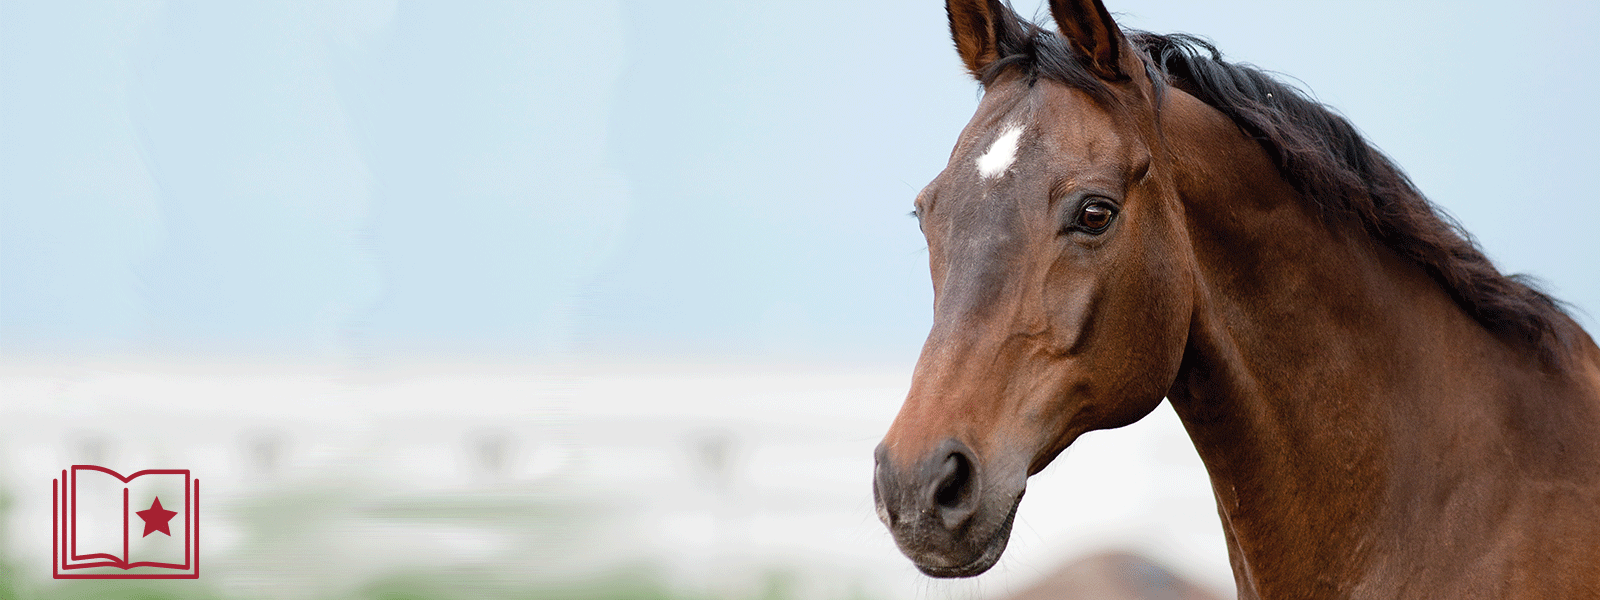

In [ ]:
img=open_image(Path('drive/My Drive/Data/train/Horse/Horse (1).gif'))
img

In [ ]:
learn.save('stage-1(4 animals)')

In [ ]:
pred_class,pred,outputs=learn.predict(img)
pred_class.obj

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


'Horse'

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()


IndexError: ignored

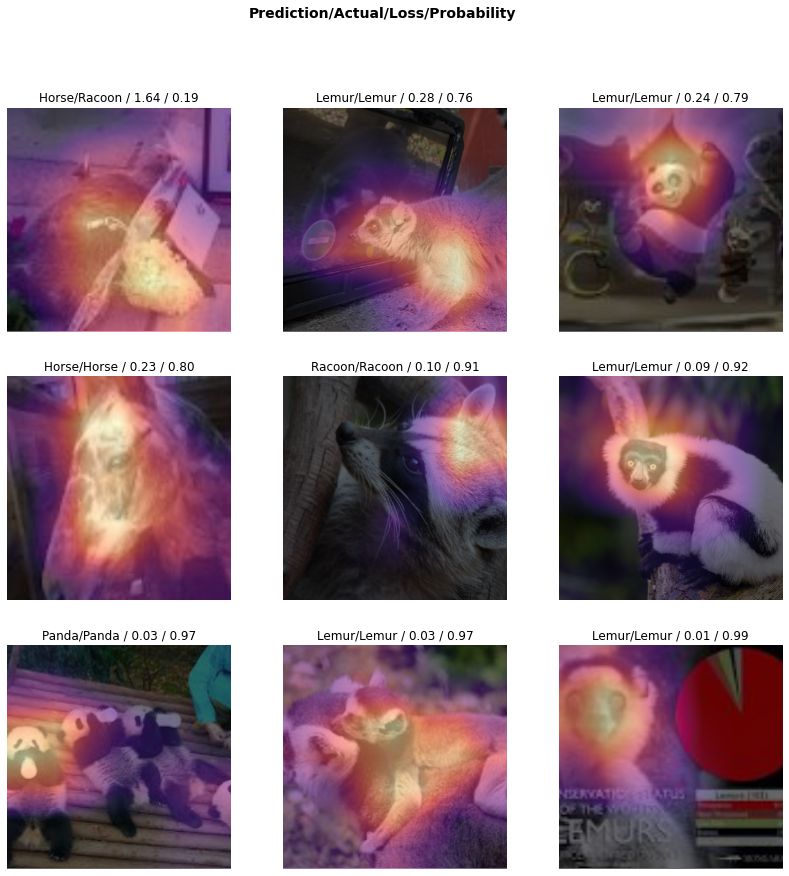

In [ ]:
interp.plot_top_losses(9,heatmap=True,figsize=(14,14))

In [ ]:
doc(interp.most_confused)

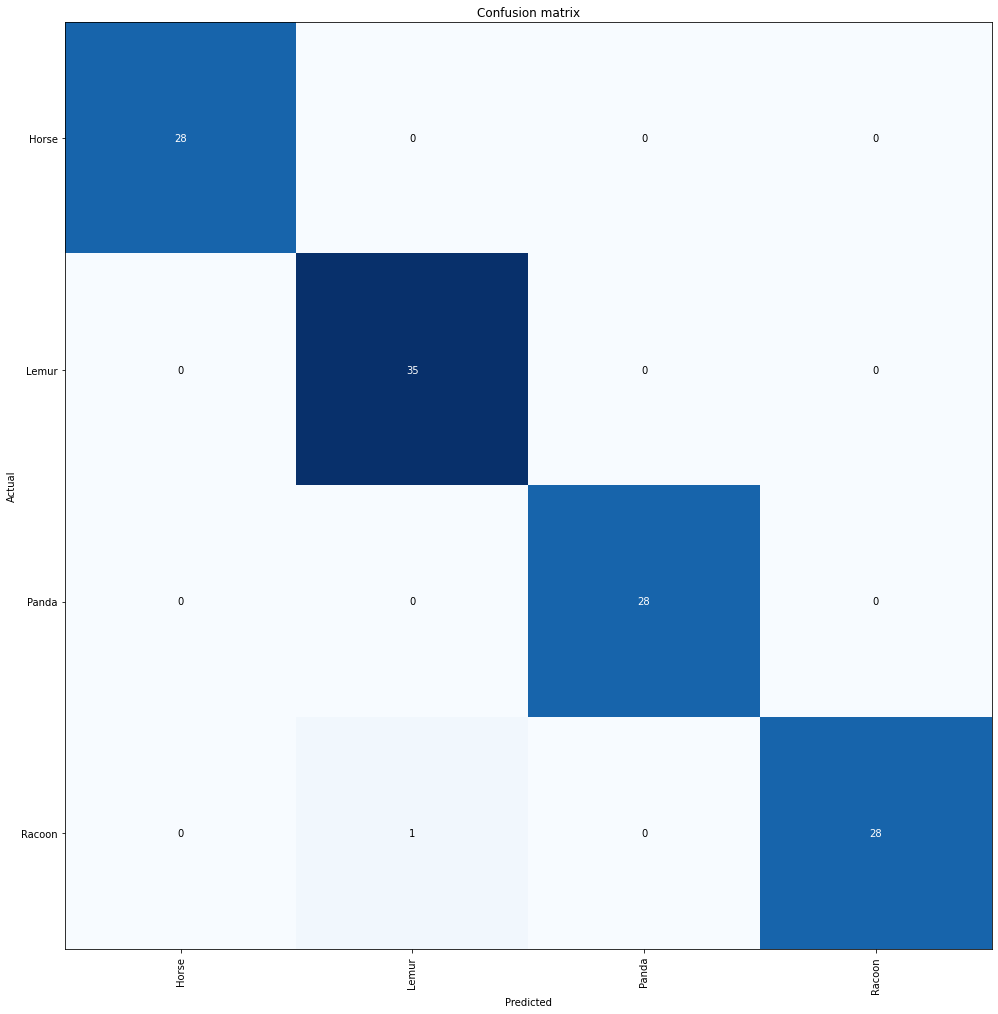

In [ ]:
interp.plot_confusion_matrix(figsize=(14,14))

In [ ]:
interp.most_confused(min_val=2)

[]

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
learn.load('stage-1( animals)')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Learner(data=ImageDataBunch;

Train: LabelList (481 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Horse,Horse,Horse,Horse,Horse
Path: /content/drive/My Drive/Data/train;

Valid: LabelList (120 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Panda,Panda,Horse,Panda,Lemur
Path: /content/drive/My Drive/Data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, ep

In [ ]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


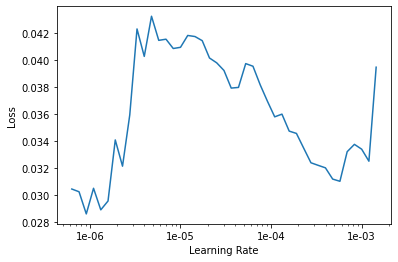

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(5e-6,1e-6))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

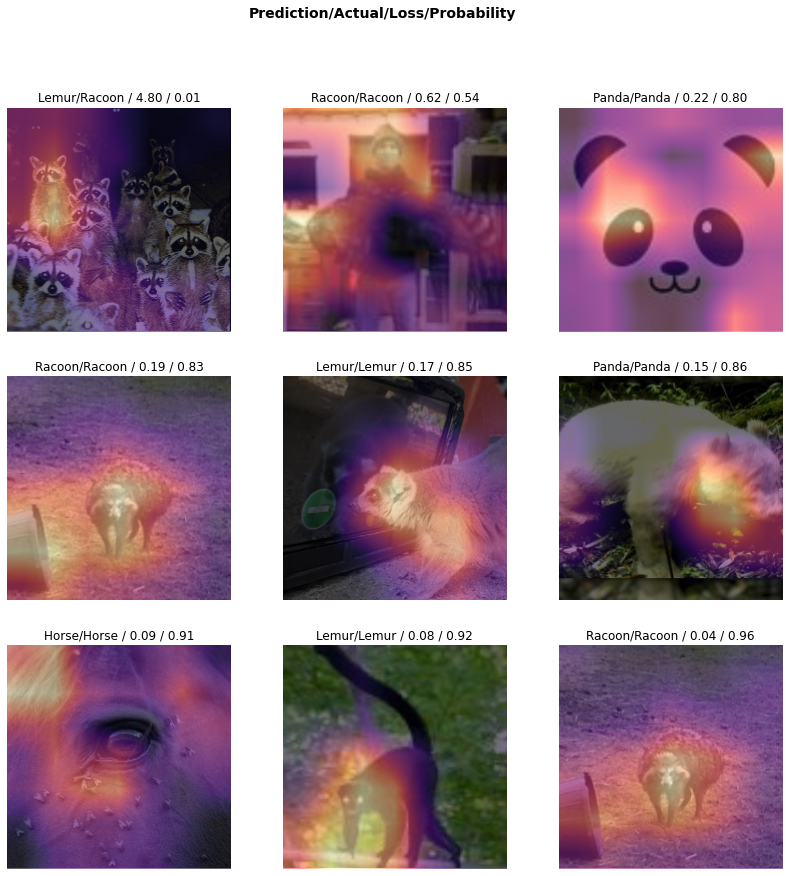

In [ ]:
interp.plot_top_losses(9,heatmap=True,figsize=(14,14))

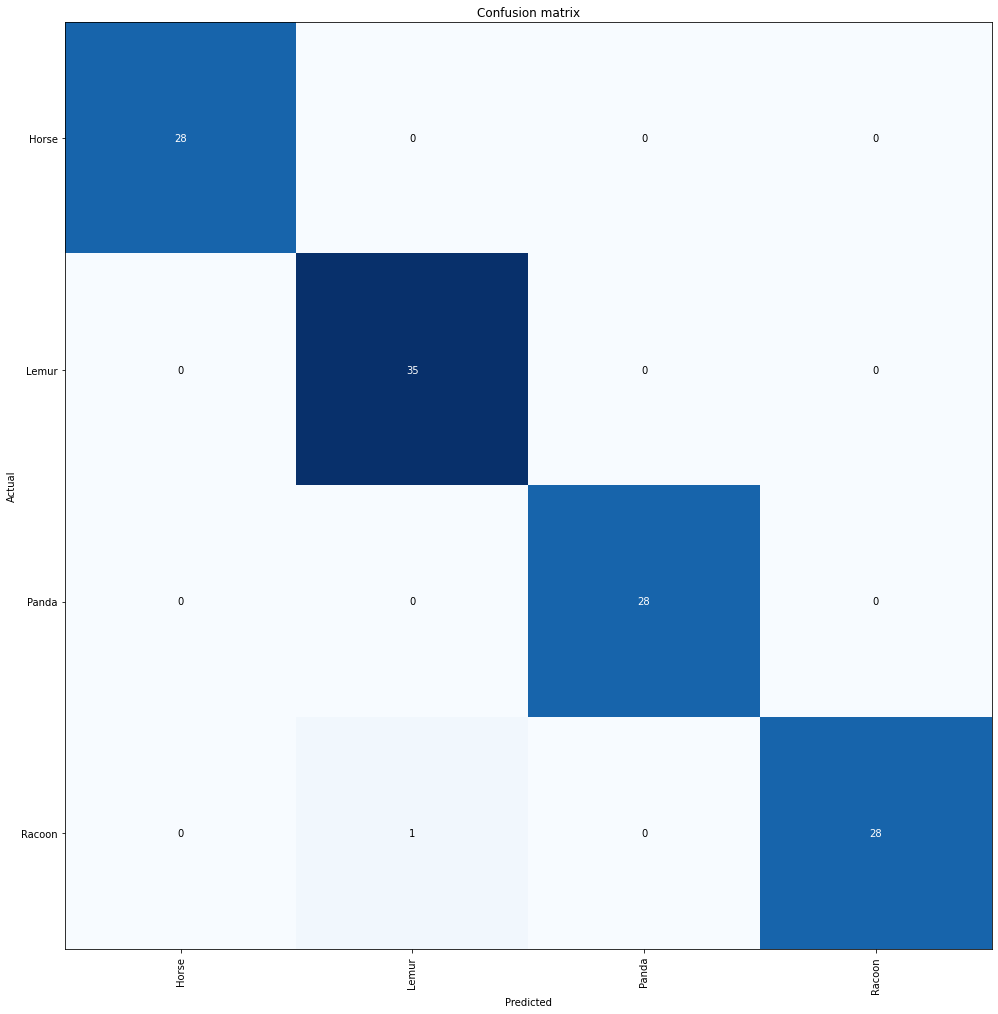

In [ ]:
interp.plot_confusion_matrix(figsize=(14,14))

In [ ]:
interp.most_confused(min_val=1)

[('Racoon', 'Lemur', 1)]

In [ ]:
doc(ImageDataBunch)

In [ ]:
!pip install starlette

     |████████████████████████████████| 61kB 2.7MB/s 


In [ ]:
!pip install uvicorn


     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 225kB 11.2MB/s 
     |████████████████████████████████| 3.9MB 16.0MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 


START FACIAL EXPRESSION PROJ
**bold text**

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

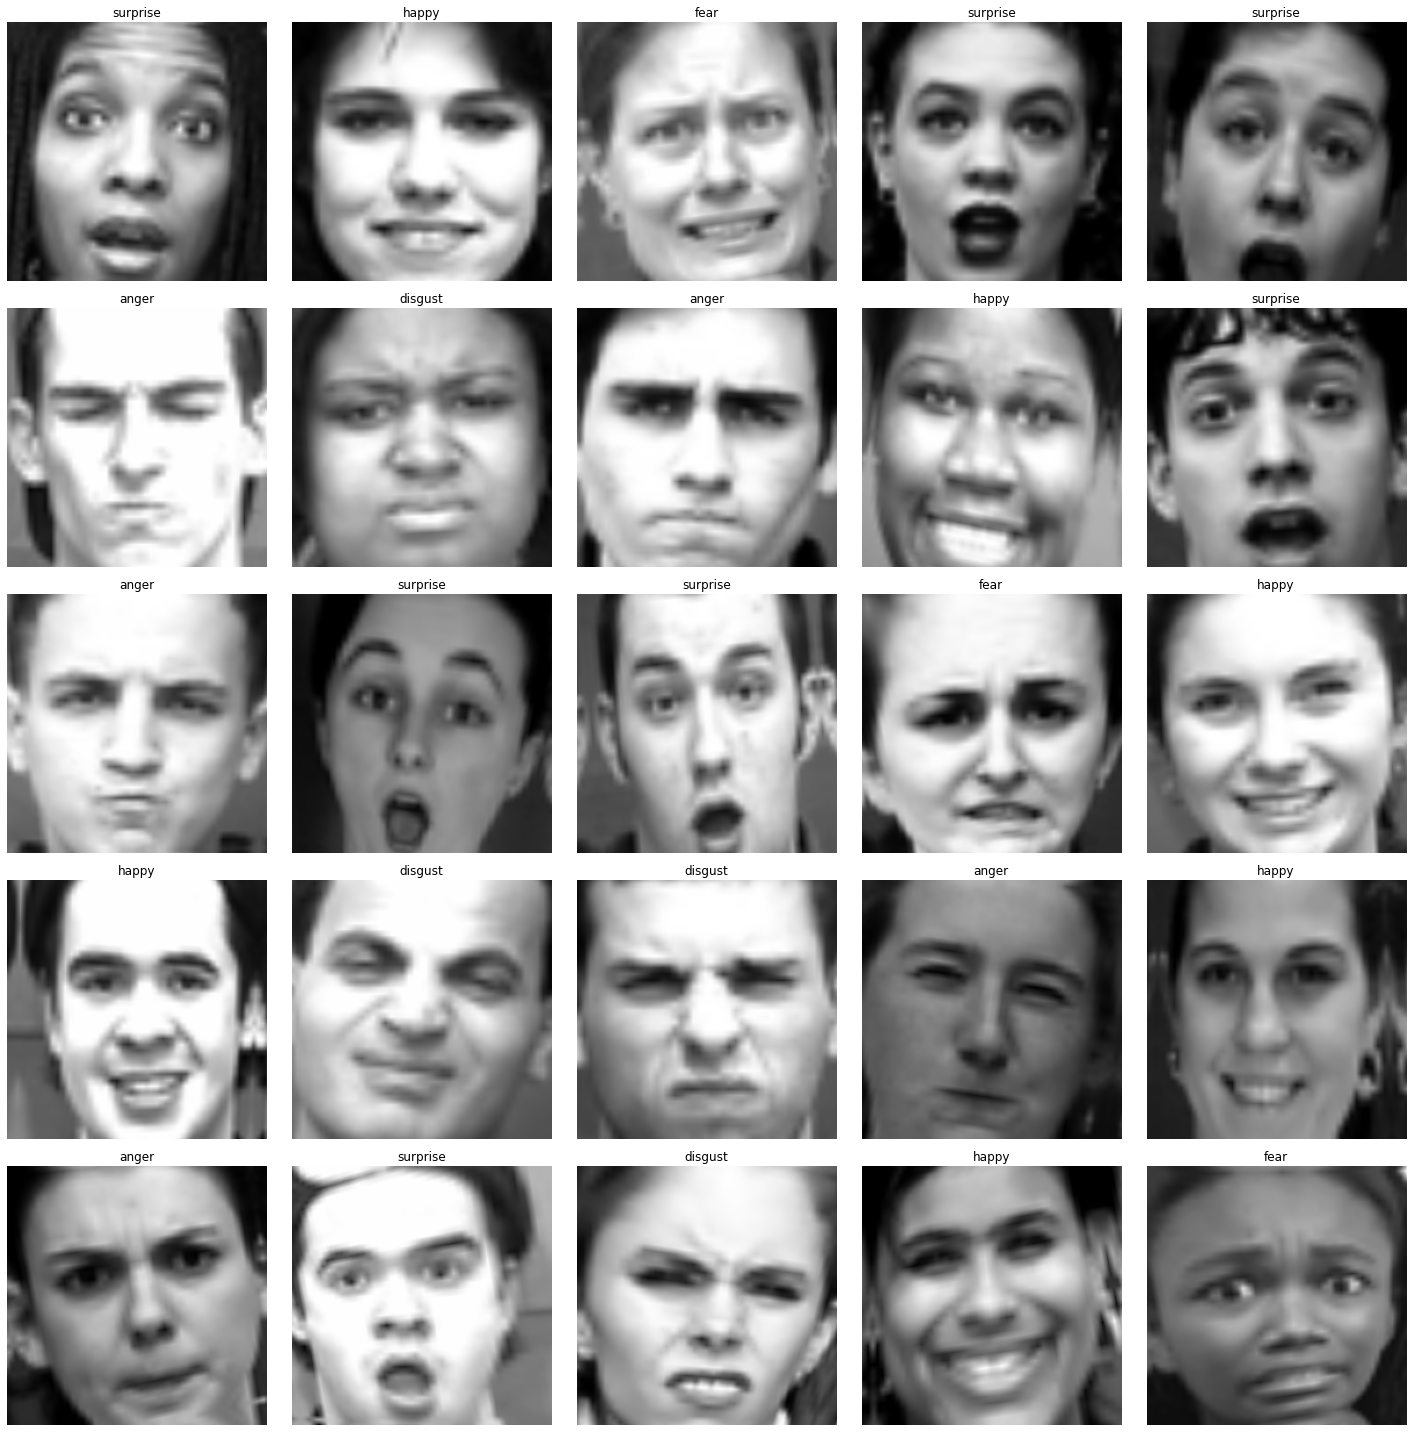

In [ ]:
data = ImageDataBunch.from_folder(Path("/content/drive/My Drive/CK+48"),train='.',valid_pct=0.2, ds_tfms=get_transforms(), size=224,num_workers=2, bs=64)
data.show_batch(rows=5)

In [ ]:
data.classes

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [ ]:
df=pd.read_csv('Edited.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.rename(columns={'emotion':'label','image':'name'},inplace=True)

In [ ]:
df.head()

name     label
0  facial-expressions_2868588k.jpg     anger
1  facial-expressions_2868585k.jpg  surprise
2  facial-expressions_2868584k.jpg   disgust
3  facial-expressions_2868582k.jpg      fear
4           Aaron_Eckhart_0001.jpg   neutral

In [ ]:
a=pd.read_csv('content/images/labels.csv')
a.head()


FileNotFoundError: ignored

In [ ]:
path=Path('//content//drive//My Drive//images')

In [ ]:
data=ImageDataBunch.from_csv(path,ds_tfms= get_transforms(do_flip=False),size=224,bs=28,csv_labels='labels.csv')

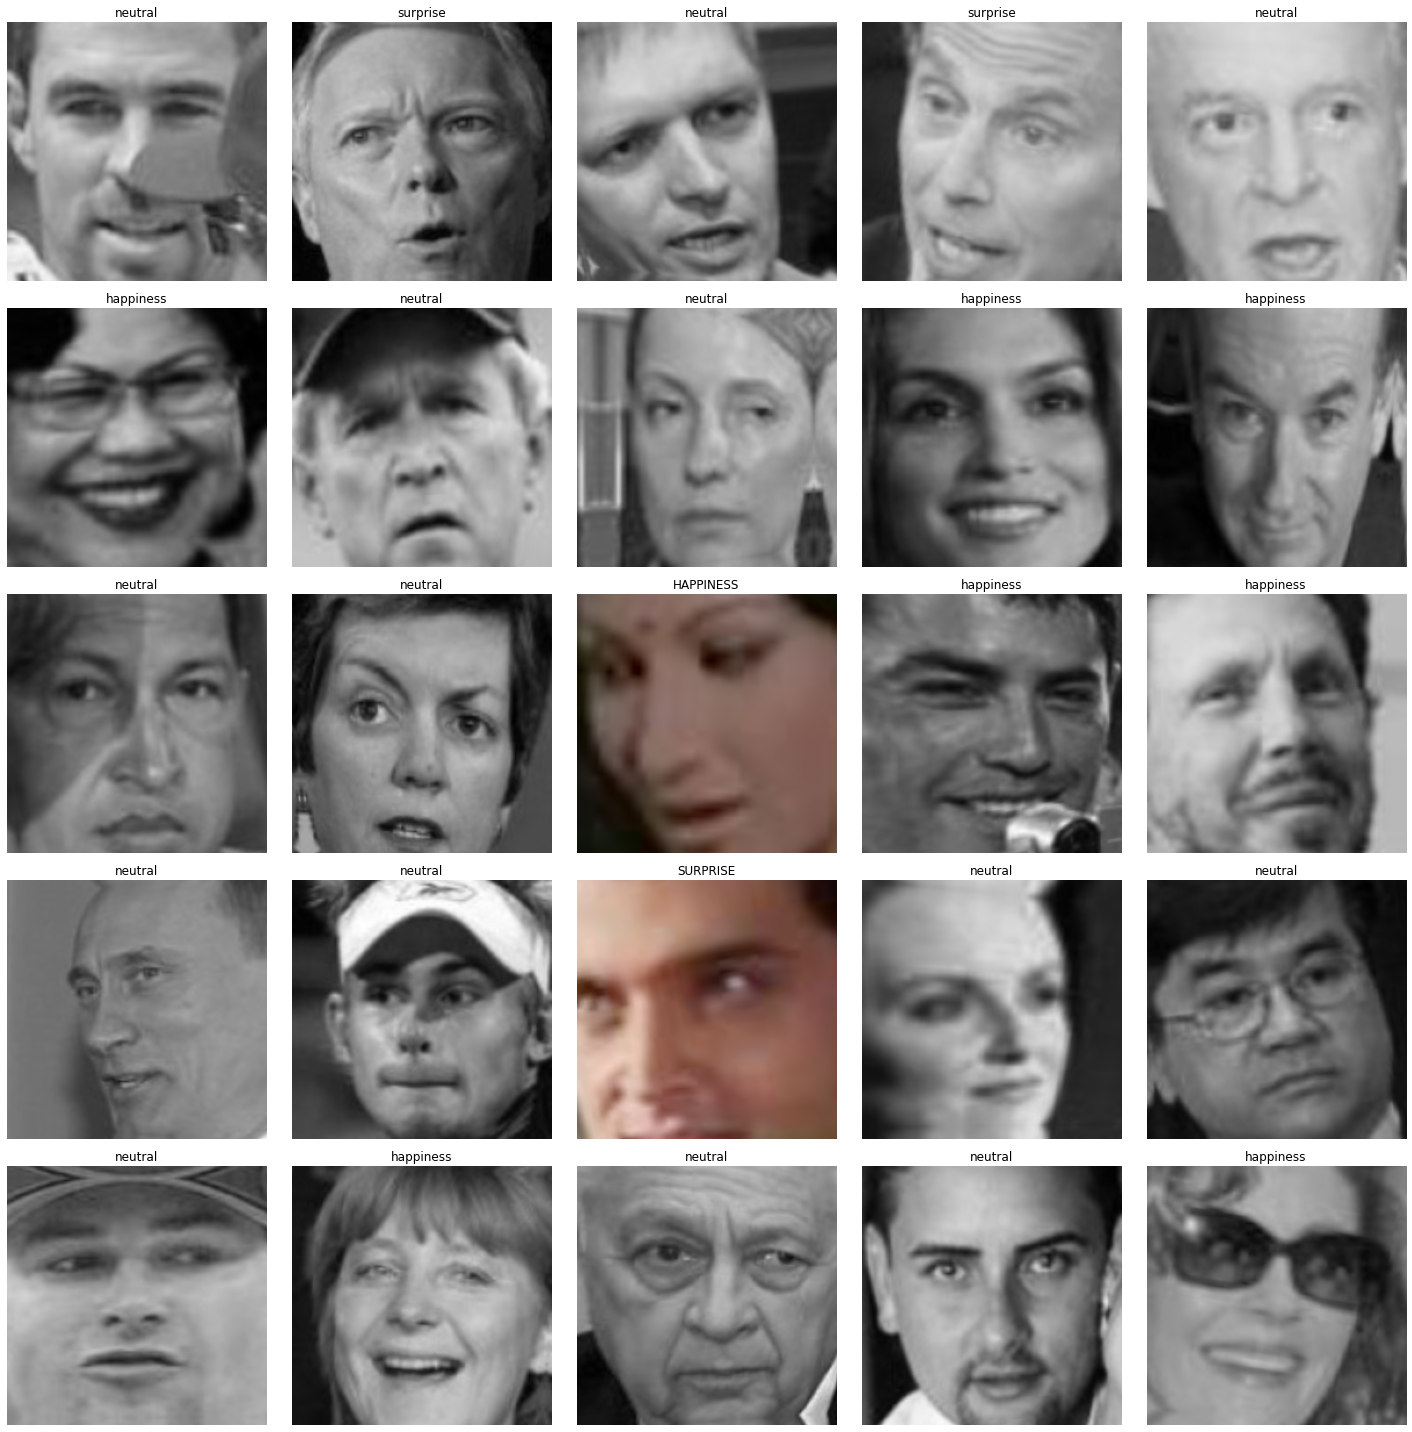

In [ ]:
data.show_batch()

In [ ]:
data.classes

['ANGER',
 'DISGUST',
 'FEAR',
 'HAPPINESS',
 'NEUTRAL',
 'SADNESS',
 'SURPRISE',
 'anger',
 'contempt',
 'disgust',
 'fear',
 'happiness',
 'neutral',
 'sadness',
 'surprise']

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


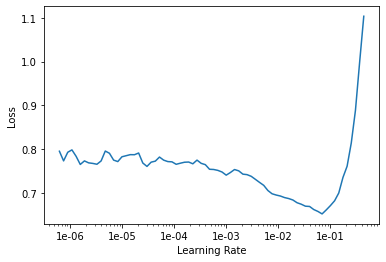

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10,slice(1e-4,8e-2))

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()


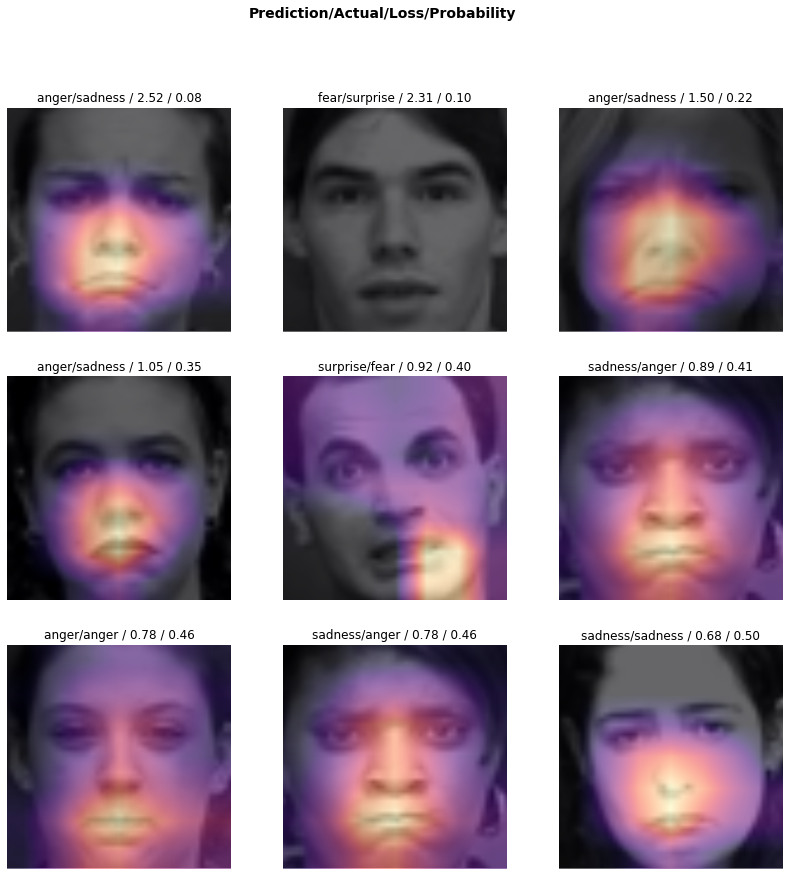

In [ ]:
interp.plot_top_losses(9,heatmap=True,figsize=(14,14))

In [ ]:
pred_class,pred,outputs=learn.predict(img)
pred_class.obj

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


'happy'

In [ ]:
learn.export()

In [ ]:
learn=load_learner(Path("/content/drive/My Drive/CK+48"))

In [ ]:
!python3 "/content/drive/My Drive/CAM.py"

[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (802) open VIDEOIO ERROR: V4L: can't open camera by index 0
Traceback (most recent call last):
  File "/content/drive/My Drive/CAM.py", line 5, in <module>
    t=time.process_time_ns()
AttributeError: module 'time' has no attribute 'process_time_ns'


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


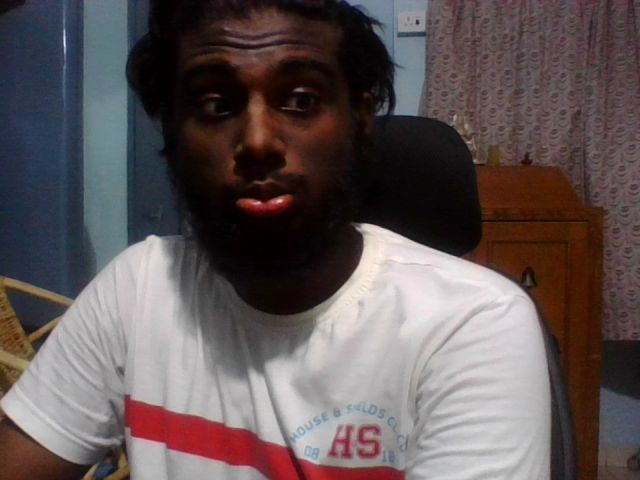

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))